In [1]:
### Project Steps ###

# 1. data cleaning
# 2. EDA
# 3. Text Preprocessing(Data Preprocessing) 
#     Lower Case
#     Tokenization
#     Removing special charachter
#     Removing stop words and punctuation
#     Stemming
# 4. Model building
# 5. Evaluation
# 6. Improvment
# 7 Website
# 8. Deploy

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [4]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5534,ham,Ok which your another number,NaN,NaN,NaN
5434,ham,Jesus armand really is trying to tell everybod...,NaN,NaN,NaN
4669,ham,"I didnt get ur full msg..sometext is missing, ...",NaN,NaN,NaN
389,ham,Yup having my lunch buffet now.. U eat already?,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#  drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# renaming the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.head(2)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [10]:
# Lable Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df.Target = encoder.fit_transform(df.Target)

In [12]:
df.head(4)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [13]:
#  Checking for missing  values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicate
df = df.drop_duplicates()

In [16]:
df.shape

(5169, 2)

# 2.EDA

In [17]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

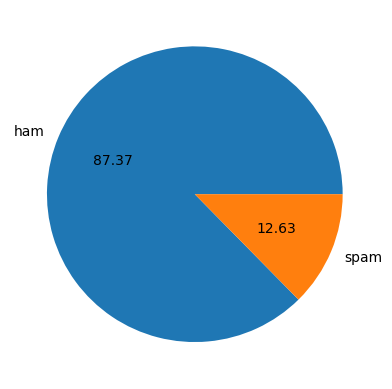

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
#   data is imbalanced --> loking pie plot

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\chetan
[nltk_data]     more\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# num of characters
df['num_characters'] = df['Text'].apply(len)

C:\Temp\ipykernel_23612\4109455603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [23]:
df.head(3)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [24]:
# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Temp\ipykernel_23612\1152211522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [25]:
df.head(3)

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [26]:
# num of sentence
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Temp\ipykernel_23612\36362337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [27]:
df.head(5)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [31]:
# Histrogram
import seaborn as sns

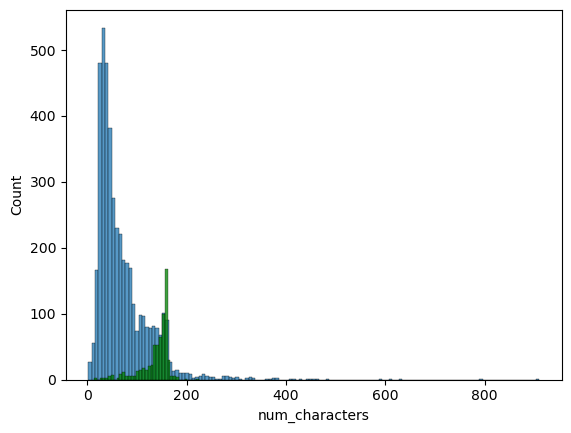

In [32]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='green')
plt.show()

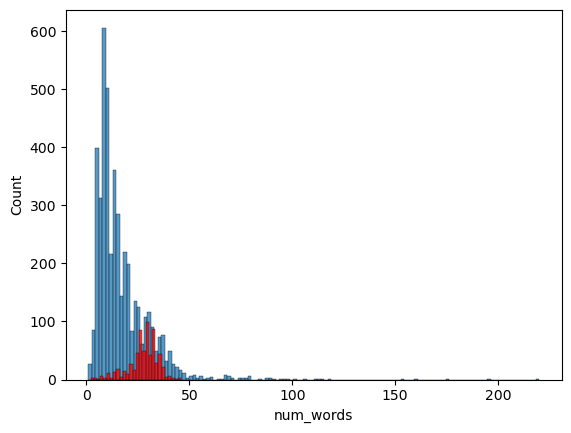

In [33]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')
plt.show()

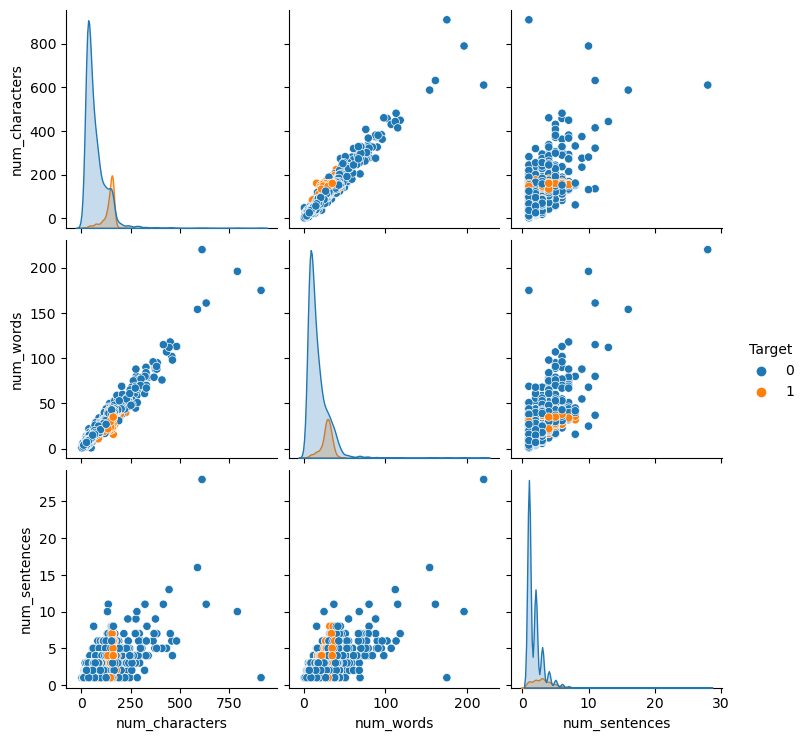

In [34]:
sns.pairplot(df,hue='Target')
plt.show()

C:\Temp\ipykernel_23612\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


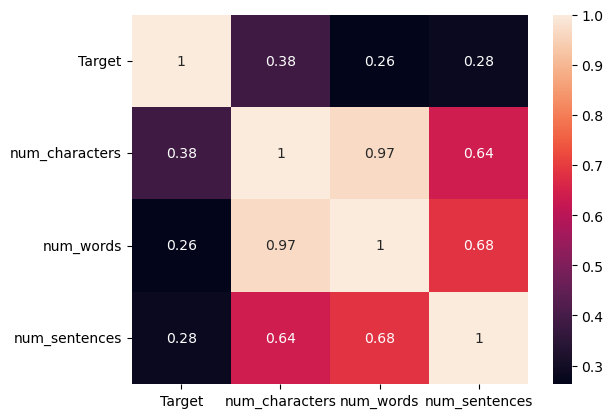

In [35]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# 3. Data Preprocessing (Text Preprocessing)

     Lower Case
     Tokenization
     Removing special charachter (The,is tyep of word)
     Removing stop words and punctuation(%,$,#)
     Stemming

In [36]:
import string

nltk.download('stopwords')
# Now you can use stopwords
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

[nltk_data] Downloading package stopwords to C:\Users\chetan
[nltk_data]     more\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'love'

In [45]:
def transform_text(text):
    
#      Lower Case
    text = text.lower()
    
#      Tokenization
    text = nltk.word_tokenize(text)
    

#     Removing special charachter
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
#     Removing stop words and punctuation(%,$,#)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
           
        
#     Stemming    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)

In [52]:
df['transform_text'] = df['Text'].apply(transform_text)

C:\Temp\ipykernel_23612\538512698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text'] = df['Text'].apply(transform_text)


In [53]:
df.head(5)

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
# make word cloud
!pip install wordcloud


from wordcloud import WordCloud
wc = WordCloud()
# Your WordCloud code here



     ------------------------------------ 300.0/300.0 kB 883.4 kB/s eta 0:00:00


In [67]:
# spam msg
spam_wc = wc.generate(df[df['Target']==1]['transform_text'].str.cat(sep=''))

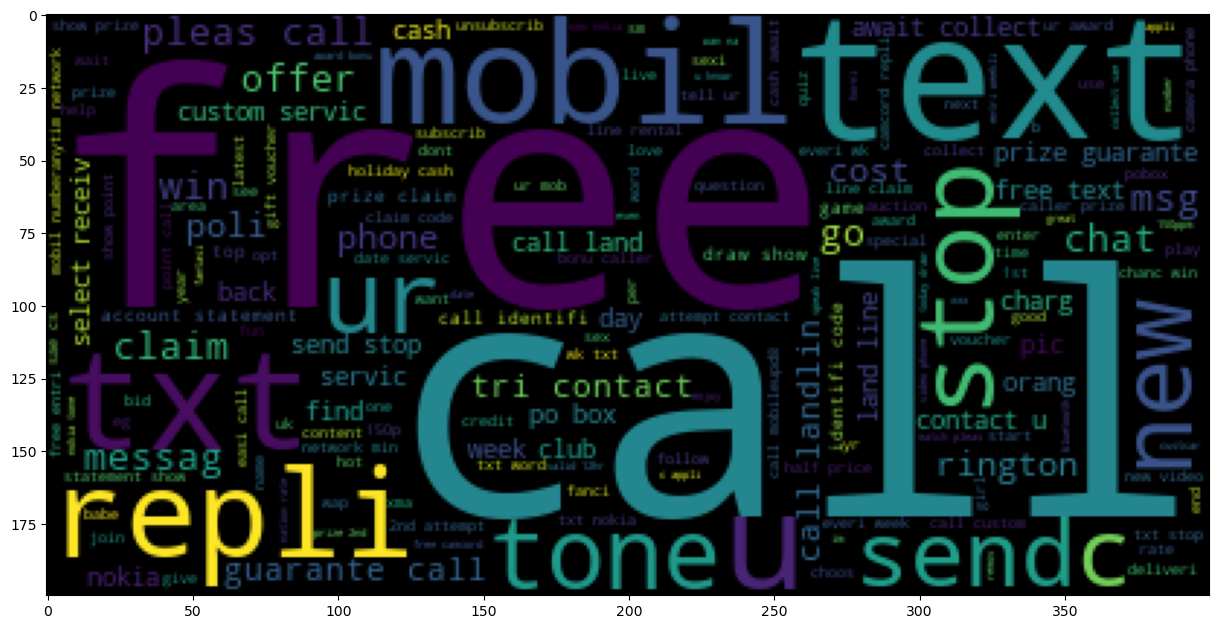

In [71]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [72]:
# ham msg
ham_wc = wc.generate(df[df['Target'] == 0]['transform_text'].str.cat(sep=''))

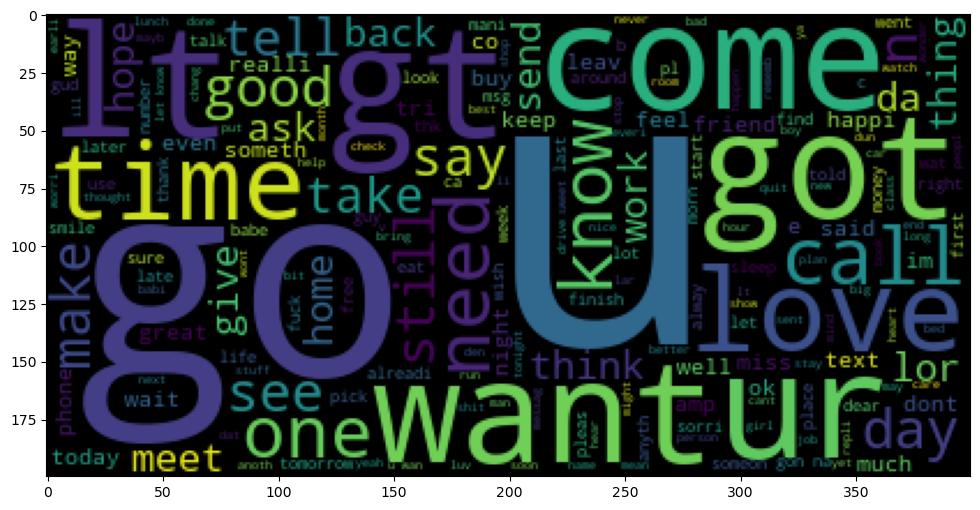

In [74]:
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)

In [80]:
# top 30 words
spam_corpus = []
for msg in df[df['Target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [81]:
len(spam_corpus)

9939

In [96]:
pd.DataFrame(Counter(spam_corpus).most_common(10))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103
